### Assigment 3
### 21BDA59
### EDA and Logistic Regression


In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
train = pd.read_csv('train.csv')

In [39]:
#Lest see how the data is distributed
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

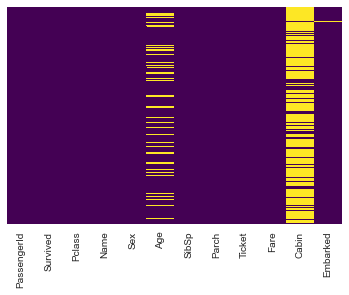

In [41]:
#Lets do some exploratory data analysis.

#Lets find out the missing data in our data set
#This heatmap shows the null values in yellow line.
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

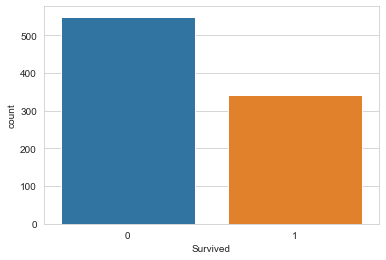

In [42]:
#EDA
#Lets see how many of survived andd how many of not.
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

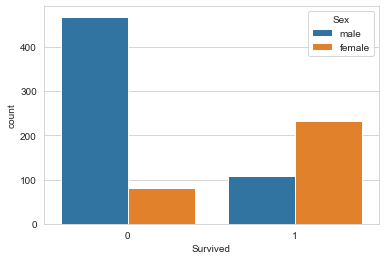

In [43]:
#Lets see this survival rate as per sex.
sns.countplot(x = 'Survived', data = train, hue = 'Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

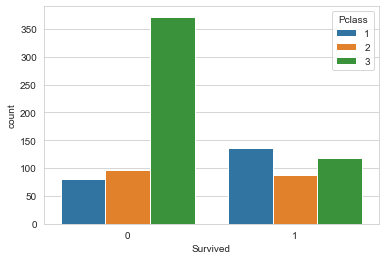

In [44]:
#Now the survival rate as per of Pclass
#Here we see the the passenger are in 3rd clas are more likely to not survived.
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

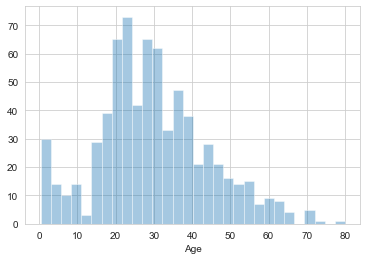

In [45]:
#Lets see distribution of age in the dataset
#Here we see that mor number of peoples as of the young age between 20 to 30
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

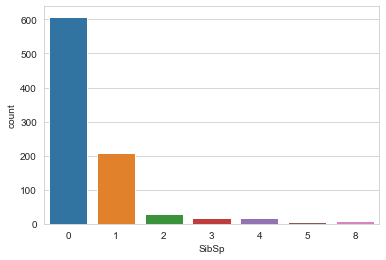

In [46]:
#Lets look at the sibling and spouse column 
sns.countplot(x = 'SibSp', data = train)

<AxesSubplot:>

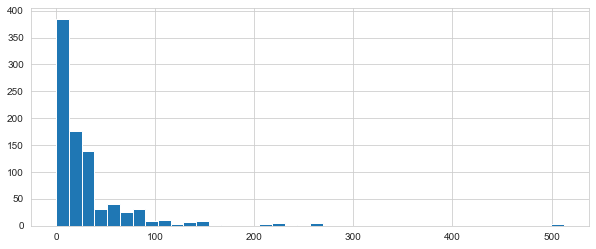

In [47]:
#Now lets explore the fair column
train['Fare'].hist(bins = 40, figsize=(10,4))

In [48]:
#Now lets explore this column with some interactive plot using cufflinks.
train['Fare'].iplot(kind='hist')

AttributeError: 'Series' object has no attribute 'iplot'

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

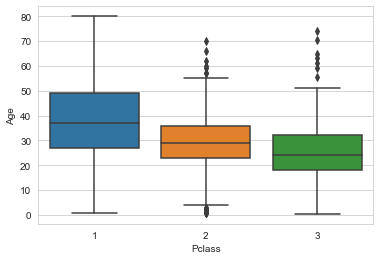

In [49]:
#Now lets deal with the missing data.
#Filling the age as the mean of the present ages.
#Lets do it the smart way by considering Pclass.
sns.boxplot(x = 'Pclass', y='Age', data = train)

In [50]:
#Now impute the age as considering the Pclass
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [51]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

<AxesSubplot:>

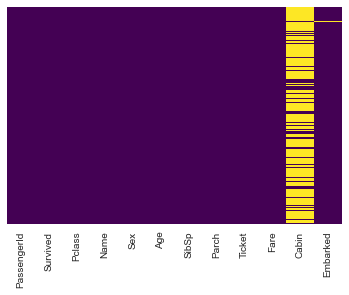

In [52]:
#Now lets check our data.
#We see that our data is sucessfully filled the age values.
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap="viridis")

<AxesSubplot:>

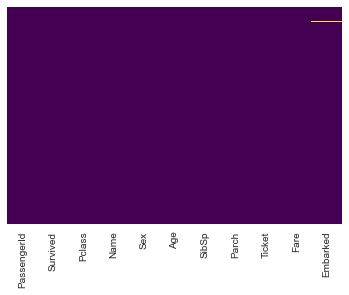

In [53]:
#Now lets drop the coloumn Cabin because it has high number of missing valus.
train.drop('Cabin', axis = 1, inplace = True)
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap="viridis")

#Now our data is free from missing values as the plot showing one solid color only.

In [54]:
#Now lets create dummy varibles for the categorical columns.
sex = pd.get_dummies(train['Sex'],drop_first = True)

In [55]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)

In [56]:
#lets join the two dummies we have make in our original dataset
train = pd.concat([train, sex, embark], axis = 1)


In [57]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace = True)

In [58]:
#Now we see that our dataset is good for performing machine learning algorithms.
#We have now all numerical columns

train.drop(['PassengerId'], axis=1, inplace = True)

In [59]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [60]:
#Now lets train our model to do predictions.
#For that first we need to divide our data set in two datasets
X=train.drop('Survived', axis = 1)
y= train['Survived']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state=101)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
#Lets create a instance of LogisticRegression
logmodel = LogisticRegression()

In [65]:
#Lets fit a model first
logmodel.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
#Lets do predictions
predictions = logmodel.predict(X_test)

In [67]:
#we have predict our predictions now.
#Lets check the classification report of our predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [68]:
#Lets check the confusion matrix for the same.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[133,  21],
       [ 38,  76]], dtype=int64)